In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import unidecode

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_parquet('CAD_UNIC_MAI_DT_23_04_05_23.parquet')

In [4]:
df_renda_pobreza = df[df['d.vlr_renda_media_fam'] <= 218]

### Plot gráfico piso

In [6]:
dfgroup2 = df_renda_pobreza.groupby(['d.cod_familiar_fam', 'd.cod_material_piso_fam']).size()
groupby_piso = dfgroup2.groupby('d.cod_material_piso_fam').size()

df2 = groupby_piso.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df2['porcent']= df2['Quantidade']/df2.values.sum()
df2['porcent'] = (df2.porcent*100).round(2)

dict_piso = {0: 'Terra',
1: 'Cimento',
2: 'Madeira aproveitada',
3: 'Madeira aparelhada',
4: 'Ceramica, lajota ou pedra',
5: 'Carpete',
6: 'Outro Material'}

df2['Tipos de material do piso'] = pd.Series(dict_piso)

df2 = df2.rename(columns={'porcent': 'Porcentagem'})

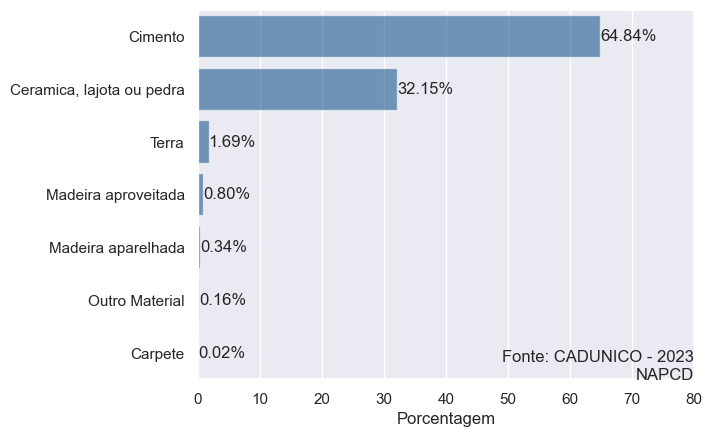

In [24]:
d = { 
    0: "Terra",
    1: "Cimento",
    2: "Madeira aproveitada",
    3: "Madeira aparelhada",
    4: "Ceramica, lajota ou pedra",
    5: "Carpete",
    6: "Outro Material"
}
sns.set_theme()

plot_order = df2.sort_values('Quantidade', ascending=False)
plot_order = plot_order.rename(d)
ax = sns.barplot(data=plot_order, y=plot_order.index, x='Porcentagem', orient='h', order =plot_order.index, color="#0B5BA4",alpha=0.6)
#   .set(title='Número de domicílios por tipo de material predominante no piso')
# plt.title('Número de domicílios por tipo de material predominante no piso')
plt.xlim(0, 80)
#ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
ax.bar_label(ax.containers[0], fmt='{:.2f}%')
ax.set(xlabel='Porcentagem')
ax = plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)

### Plot gráfico distribuição de renda

In [10]:
df_renda_pobreza_ate_89 = df[df['d.vlr_renda_media_fam'] <= 89]
df_renda_pobreza_de_89_ate_218 = df[(df['d.vlr_renda_media_fam'] > 89) & (df['d.vlr_renda_media_fam'] <= 218)]

In [11]:
dfgroup3 = df_renda_pobreza_ate_89.groupby(['d.cod_familiar_fam', 'd.cod_material_piso_fam']).size()
groupby_piso_89 = dfgroup3.groupby('d.cod_material_piso_fam').size()

df_renda_piso_89 = groupby_piso_89.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df_renda_piso_89['porcent']= df_renda_piso_89['Quantidade']/df_renda_piso_89.values.sum()
df_renda_piso_89['porcent'] = (df_renda_piso_89.porcent*100).round(2)

dict_piso = {0: 'Terra',
1: 'Cimento',
2: 'Madeira aproveitada',
3: 'Madeira aparelhada',
4: 'Ceramica, lajota ou pedra',
5: 'Carpete',
6: 'Outro Material'}

df_renda_piso_89['Tipos de material do piso'] = pd.Series(dict_piso)

df_renda_piso_89 = df_renda_piso_89.rename(columns={'porcent': 'Porcentagem'})
df_renda_piso_89 = df_renda_piso_89[['Tipos de material do piso', 'Quantidade', 'Porcentagem']]
df_renda_piso_89['Renda'] = 'Até R$89,00'

In [12]:
dfgroup4 = df_renda_pobreza_de_89_ate_218.groupby(['d.cod_familiar_fam', 'd.cod_material_piso_fam']).size()
groupby_piso_89_218 = dfgroup4.groupby('d.cod_material_piso_fam').size()

df_renda_piso_89_218 = groupby_piso_89_218.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df_renda_piso_89_218['porcent']= df_renda_piso_89_218['Quantidade']/df_renda_piso_89_218.values.sum()
df_renda_piso_89_218['porcent'] = (df_renda_piso_89_218.porcent*100).round(2)

dict_piso = {0: 'Terra',
1: 'Cimento',
2: 'Madeira aproveitada',
3: 'Madeira aparelhada',
4: 'Ceramica, lajota ou pedra',
5: 'Carpete',
6: 'Outro Material'}

df_renda_piso_89_218['Tipos de material do piso'] = pd.Series(dict_piso)

df_renda_piso_89_218 = df_renda_piso_89_218.rename(columns={'porcent': 'Porcentagem'})
df_renda_piso_89_218 = df_renda_piso_89_218[['Tipos de material do piso', 'Quantidade', 'Porcentagem']]
df_renda_piso_89_218['Renda'] = 'De R\$89,01 até R\$218,00'

In [13]:
data=(df_renda_piso_89, df_renda_piso_89_218)
df_renda_piso_comparacao = pd.concat(data)

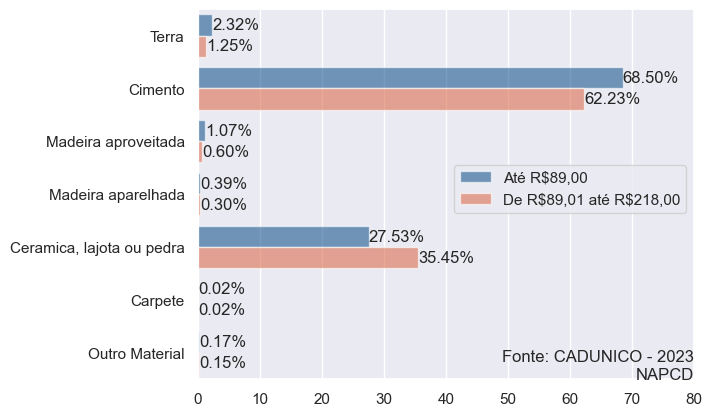

In [28]:
sns.set_theme()
sns.set(font_scale=1)
colors = sns.color_palette(['#0B5BA4', '#f26339'])
ax = sns.barplot(data=df_renda_piso_comparacao, x="Porcentagem", y='Tipos de material do piso', hue="Renda", 
                 orient='h', palette=colors, alpha=0.6, width = 0.8)
ax.set(xlabel='')
ax.set(ylabel='')
plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)
ax.bar_label(ax.containers[0], fmt='{:.2f}%')
ax.bar_label(ax.containers[1], fmt='{:.2f}%')
# ax.bar_label(ax.containers[0], fontsize=9)
# ax.bar_label(ax.containers[1], fontsize=9)
plt.xlim(0, 80)
plt.legend(bbox_to_anchor=(1, .6))

### Número de domicílios por tipo de material predominante nas paredes externas do domicílio que estão na linha de pobreza.

In [15]:
dfgroup2 = df_renda_pobreza.groupby(['d.cod_familiar_fam', 'd.cod_material_domic_fam']).size()
groupby_parede = dfgroup2.groupby('d.cod_material_domic_fam').size()

In [16]:
df3 = groupby_parede.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df3['porcent']= df3['Quantidade']/df3.values.sum()
df3['porcent'] = (df3.porcent*100).round(2)

In [18]:
dict_parede = {0: 'Alvenaria/tijolo com revestimento',
1: 'Alvenaria/tijolo sem revestimento',
2: 'Madeira aparelhada',
3: 'Taipa revestida',
4: 'Taipa nao revestida',
5: 'Madeira aproveitada',
6: 'Palha',
7: 'Outro Material'}

In [20]:
df3['Tipos de material do revestimento'] = pd.Series(dict_parede)
df3 = df3.rename(columns={'porcent': 'Porcentagem'})

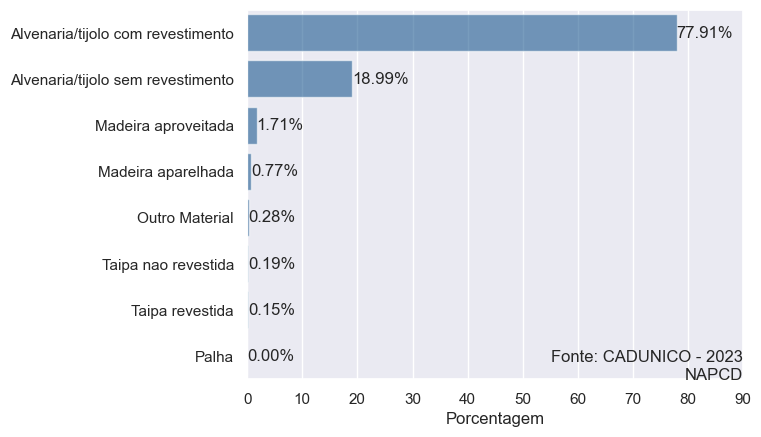

In [23]:
d = { 
    0: 'Alvenaria/tijolo com revestimento',
    1: 'Alvenaria/tijolo sem revestimento',
    2: 'Madeira aparelhada',
    3: 'Taipa revestida',
    4: 'Taipa nao revestida',
    5: 'Madeira aproveitada',
    6: 'Palha',
    7: 'Outro Material'
}
sns.set_theme()
plot_order = df3.sort_values('Quantidade', ascending=False)
plot_order = plot_order.rename(d)
ax = sns.barplot(data=plot_order, y=plot_order.index, x='Porcentagem', orient='h', order =plot_order.index, color="#0B5BA4",alpha=0.6)
#   .set(title='Número de domicílios por tipo de material predominante nas paredes externas')
# plt.title('Número de domicílios por tipo de material predominante no piso')
plt.xlim(0, 90)
#ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
# ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0], fmt='{:.2f}%')

ax.set(xlabel='Porcentagem')
ax = plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)

### Revestimento externo por distribuição de renda

In [30]:
dfgroup5 = df_renda_pobreza_ate_89.groupby(['d.cod_familiar_fam', 'd.cod_material_domic_fam']).size()
groupby_parede_89 = dfgroup5.groupby('d.cod_material_domic_fam').size()

df_renda_parede_89 = groupby_parede_89.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df_renda_parede_89['porcent']= df_renda_parede_89['Quantidade']/df_renda_parede_89.values.sum()
df_renda_parede_89['porcent'] = (df_renda_parede_89.porcent*100).round(2)

df_renda_parede_89['Tipos de material do revestimento'] = pd.Series(dict_parede)

df_renda_parede_89 = df_renda_parede_89.rename(columns={'porcent': 'Porcentagem'})
df_renda_parede_89 = df_renda_parede_89[['Tipos de material do revestimento', 'Quantidade', 'Porcentagem']]
df_renda_parede_89['Renda'] = 'Até R$89,00'

In [31]:
dfgroup6 = df_renda_pobreza_de_89_ate_218.groupby(['d.cod_familiar_fam', 'd.cod_material_domic_fam']).size()
groupby_parede_89_218 = dfgroup6.groupby('d.cod_material_domic_fam').size()

df_renda_parede_89_218 = groupby_parede_89_218.to_frame().reset_index(drop=True).rename(columns={0: 'Quantidade'})
df_renda_parede_89_218['porcent']= df_renda_parede_89_218['Quantidade']/df_renda_parede_89_218.values.sum()
df_renda_parede_89_218['porcent'] = (df_renda_parede_89_218.porcent*100).round(2)

df_renda_parede_89_218['Tipos de material do revestimento'] = pd.Series(dict_parede)

df_renda_parede_89_218 = df_renda_parede_89_218.rename(columns={'porcent': 'Porcentagem'})
df_renda_parede_89_218 = df_renda_parede_89_218[['Tipos de material do revestimento', 'Quantidade', 'Porcentagem']]
df_renda_parede_89_218['Renda'] = 'De R\$89,01 até R\$218,00'

In [33]:
data=(df_renda_parede_89, df_renda_parede_89_218)
df_renda_parede_comparacao = pd.concat(data)

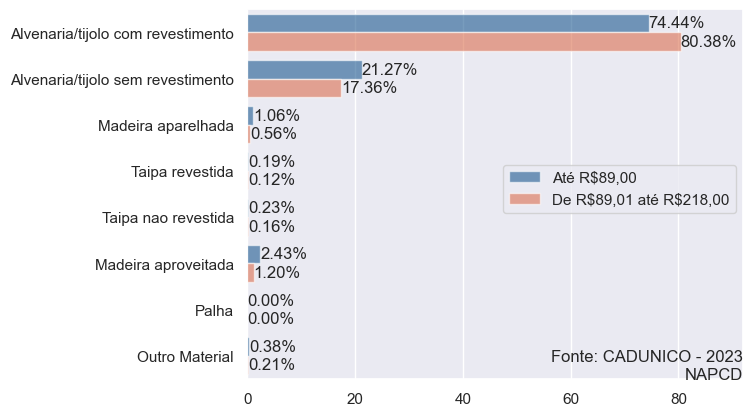

In [35]:
sns.set_theme()
sns.set(font_scale=1)
colors = sns.color_palette(['#0B5BA4', '#f26339'])
ax = sns.barplot(data=df_renda_parede_comparacao, x="Porcentagem", y='Tipos de material do revestimento', hue="Renda", 
                 orient='h', palette=colors, alpha=0.6, width = 0.8)
ax.set(xlabel='')
ax.set(ylabel='')
plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)
ax.bar_label(ax.containers[0], fmt='{:.2f}%')
ax.bar_label(ax.containers[1], fmt='{:.2f}%')
# ax.bar_label(ax.containers[0], fontsize=9)
# ax.bar_label(ax.containers[1], fontsize=9)
plt.xlim(0, 92)
plt.legend(bbox_to_anchor=(1, .6))

### Número de domicílios que possuem Pessoas com Deficiência, somente Mulheres, pessoas negras, primeira infância abaixo da linha de Pobreza.

In [36]:
df4={}
df_pretos = df_renda_pobreza[df_renda_pobreza['p.cod_raca_cor_pessoa'] == 2]
df_pardo = df_renda_pobreza[df_renda_pobreza['p.cod_raca_cor_pessoa'] == 4]

data=[df_pretos, df_pardo]
df_negros = pd.concat(data)

df_apenas_mulheres = df_renda_pobreza.groupby('d.cod_familiar_fam').agg({'p.cod_sexo_pessoa': 'min'}).reset_index()
df_deficiencia = df_renda_pobreza.groupby('d.cod_familiar_fam').agg({'p.cod_deficiencia_memb': 'max'}).reset_index()
df_infancia = df_renda_pobreza[df_renda_pobreza['p.fx_idade'] == 0]

df4['Pessoas com deficiência'] = len(df_deficiencia[df_deficiencia['p.cod_deficiencia_memb']== 1])
df4['Mulheres'] = len(df_apenas_mulheres[df_apenas_mulheres['p.cod_sexo_pessoa']== 2])
df4['Pretos e Pardos'] = len(df_negros.groupby('d.cod_familiar_fam'))
df4['Primeira infância'] = len(df_infancia.groupby('d.cod_familiar_fam'))

df4 = pd.DataFrame(df4.items())

df4 = df4.rename(columns={0: 'Categoria',
    1: 'Quantidade'})

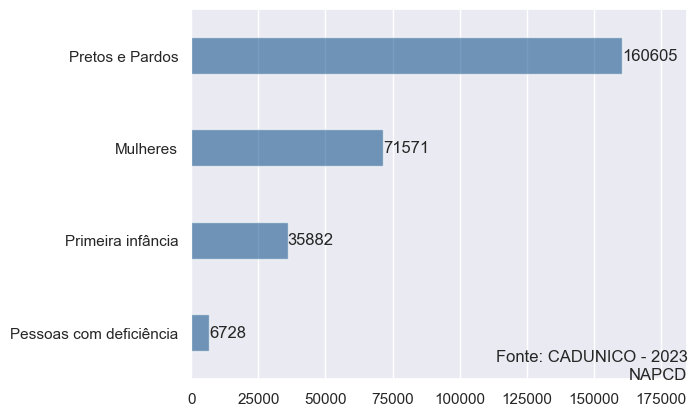

In [37]:
d = { 
    0: 'Pessoas com deficiência',
    1: 'Mulheres',
    2: 'Pretos e Pardos',
    3: 'Primeira infância'
}

sns.set_theme()

plot_order = df4.sort_values('Quantidade', ascending=False)
plot_order = plot_order.rename(d)
ax = sns.barplot(data=plot_order, y=plot_order.index, x='Quantidade', 
                 orient='h', order =plot_order.index, color="#0B5BA4",alpha=0.6,
                width = 0.4)
# plt.title('Domicílios que possuem Pessoas com Deficiência, somente Mulheres, \npessoas negras, primeira infância abaixo da lInha de Pobreza')
plt.xlim(0, 185000)
#ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
ax.bar_label(ax.containers[0])
ax.set(xlabel='')
ax = plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)

### Número de domicílios que possuem Pessoas com Deficiência, somente Mulheres, pessoas negras, primeira infância de acordo com a faixa de renda menor ou igual a 89 reais

In [39]:
df6 = df[['d.cod_familiar_fam', 'p.cod_deficiencia_memb', 'p.cod_sexo_pessoa', 'p.cod_raca_cor_pessoa', 'p.fx_idade', 'd.vlr_renda_media_fam']]
df6_ate_89 = df6[(df6['d.vlr_renda_media_fam'] <= 89)]

In [40]:
df_ate_89 = {}

df_pretos = df6_ate_89[df6_ate_89['p.cod_raca_cor_pessoa'] == 2]
df_pardos = df6_ate_89[df6_ate_89['p.cod_raca_cor_pessoa'] == 4]
data=[df_pretos, df_pardos]
df_negros = pd.concat(data)

df_apenas_mulheres = df6_ate_89.groupby('d.cod_familiar_fam').agg({'p.cod_sexo_pessoa': 'min'}).reset_index()
df_deficiencia = df6_ate_89.groupby('d.cod_familiar_fam').agg({'p.cod_deficiencia_memb': 'max'}).reset_index()
df_infancia = df6_ate_89[df6_ate_89['p.fx_idade'] == 0]

df_ate_89['Pessoas com deficiência'] = len(df_deficiencia[df_deficiencia['p.cod_deficiencia_memb']== 1])
df_ate_89['Mulheres'] = len(df_apenas_mulheres[df_apenas_mulheres['p.cod_sexo_pessoa']== 2])
df_ate_89['Pretos e Pardos'] = len(df_negros.groupby('d.cod_familiar_fam'))
df_ate_89['Primeira infância'] = len(df_infancia.groupby('d.cod_familiar_fam'))

df_ate_89 = pd.DataFrame(df_ate_89.items())
df_ate_89 = df_ate_89.rename(columns={0: 'Categoria',
    1: 'Quantidade'})

df_ate_89['Renda'] = 'Até R$89,00'

In [41]:
df6_de_89_ate_218 = df6[(df6['d.vlr_renda_media_fam'] > 89) & (df6['d.vlr_renda_media_fam'] <= 218)]

In [42]:
df_de_89_ate_218 = {}

df_pretos = df6_de_89_ate_218[df6_de_89_ate_218['p.cod_raca_cor_pessoa'] == 2]
df_pardos = df6_de_89_ate_218[df6_de_89_ate_218['p.cod_raca_cor_pessoa'] == 4]
data=[df_pretos, df_pardos]
df_negros = pd.concat(data)

df_apenas_mulheres = df6_de_89_ate_218.groupby('d.cod_familiar_fam').agg({'p.cod_sexo_pessoa': 'min'}).reset_index()
df_deficiencia = df6_de_89_ate_218.groupby('d.cod_familiar_fam').agg({'p.cod_deficiencia_memb': 'max'}).reset_index()
df_infancia = df6_de_89_ate_218[df6_de_89_ate_218['p.fx_idade'] == 0]

df_de_89_ate_218['Pessoas com deficiência'] = len(df_deficiencia[df_deficiencia['p.cod_deficiencia_memb']== 1])
df_de_89_ate_218['Mulheres'] = len(df_apenas_mulheres[df_apenas_mulheres['p.cod_sexo_pessoa']== 2])
df_de_89_ate_218['Pretos e Pardos'] = len(df_negros.groupby('d.cod_familiar_fam'))
df_de_89_ate_218['Primeira infância'] = len(df_infancia.groupby('d.cod_familiar_fam'))

df_de_89_ate_218 = pd.DataFrame(df_de_89_ate_218.items())
df_de_89_ate_218 = df_de_89_ate_218.rename(columns={0: 'Categoria',
    1: 'Quantidade'})

df_de_89_ate_218['Renda'] = 'De R\$89,01 até R\$218,00'

In [43]:
data = [df_ate_89, df_de_89_ate_218]
df_final_renda = pd.concat(data).reset_index(drop=True)

(0.0, 110000.0)

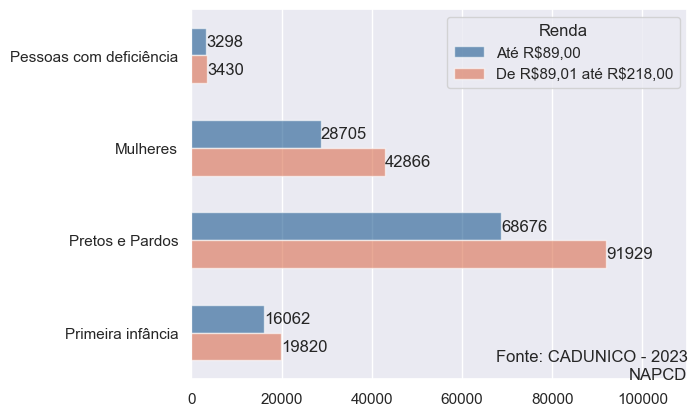

In [45]:
sns.set_theme()
colors = sns.color_palette(['#0B5BA4', '#f26339'])
ax = sns.barplot(data=df_final_renda, x="Quantidade", y='Categoria', hue="Renda", 
                 orient='h', palette=colors, alpha=0.6, width = 0.6)
ax.set(xlabel='')
ax.set(ylabel='')
plt.text(1, 0, 'Fonte: CADUNICO - 2023\nNAPCD',
     horizontalalignment='right',
     #verticalalignment='right',
     transform = ax.transAxes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlim(0, 110000)